# Predicting Survival on the Titanic

In this notebook, an ML workflow is given for exploring and analysing the Titanic dataset. Machine learning (ML) models are built to predict the survival of passengers on the Titanic.

In this notebook I have applied the knowledge acquired from various online ML courses and from studying the available information online about this dataset. 

This notebook consists of three main sections:

* exploratory data analysis
* feature engineering
* model selection and validation

<br>

## Load data

Import train and test datasets.

In [1]:
# import pandas and numpy libraries
import pandas as pd
import numpy as np

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Let's have a look at the top five rows
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<br>

## Exploratory data analysis

In this section, I will try to get some insight into the data to better understand how to further process this dataset and to design new features.

Feature definitions:

* PassengerId - unique ID of a passenger
* Survived (0 = No; 1 = Yes) - survival
* Pclass - passenger class (1 = 1st; 2 = 2nd; 3 = 3rd)
* Name - passenger name
* Sex - sex
* Age - age in years
* SibSp - number of siblings/spouses aboard
* Parch - number of parents/children aboard
* Ticket - ticket number
* Fare - passenger fare
* Cabin - cabin number
* Embarked - port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

Let's first check the size of the datasets created.

In [2]:
print('Training data dimensions: {}'.format(train.shape))
print('Test data dimensions: {}'.format(test.shape))

Training data dimensions: (891, 12)
Test data dimensions: (418, 11)


So we have 891 passenger entries in the training dataset and 418 entries in the test dataset. The extra column in the trainining dataset is the 'Survived' column (labels).

Let's check the column names.

In [3]:
train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

Let's get some initial information on the features.

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


From the above table it can be seen that the 'Age' and 'Cabin' features are missing significant amount of data. 'Emabarked' data are also missing some values. These missing values will need to be imputed.

### What is the percentage of passengers that survived?

In [5]:
# import seaborn and matplotlib
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

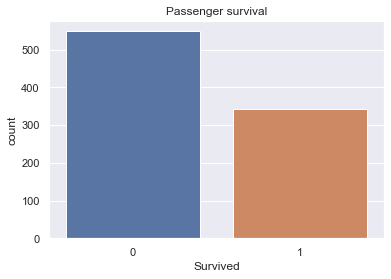

In [6]:
# use countplot
sns.countplot(x='Survived',data=train);
plt.title('Passenger survival');

In [7]:
survival = train['Survived'].value_counts()
perc_survived = survival[1]*100/survival.sum()
print('Percentage of people that survived: {}'.format(round(perc_survived)))

Percentage of people that survived: 38


### PClass: Is there a correlation between the passenger class and survival?

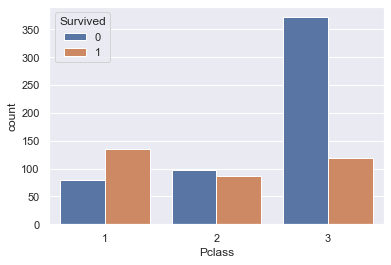

In [8]:
sns.countplot(x='Pclass', hue='Survived', data=train);

In [9]:
train.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

From the above analysis, it can be concluded that the passenger class correlates with the survival rate, i.e., passengers in classes 1 and 2 had a higher chance of surviving than the 3rd class passengers. Pclass is likely to be an important feature. 

### Sex: Is there are a correlation between the gender and survival?

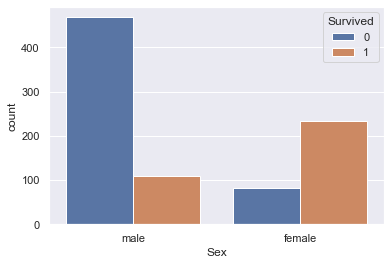

In [10]:
sns.countplot(x='Sex', hue='Survived', data = train);

It can be seen from the above plot that the vast majority of men did not survive. On the other hand, most women survived. Hence 'Sex' is most likely to be an important feature in predicting the survival of passengers. 

### Age

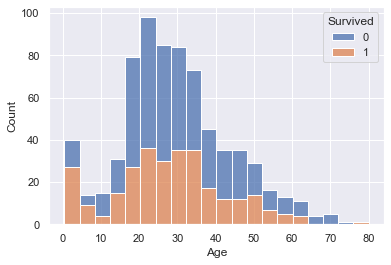

In [11]:
#stacked histogram
sns.histplot(data=train, hue='Survived', x="Age",multiple="stack");

It appears that young people (< 16-18 years of age)  had a higher chance of survival than the rest of the passengers. So Age is an important feature to consider. 

It is worth analysing the age data in more detail.

**How is age of men and women related to their survival chances?**

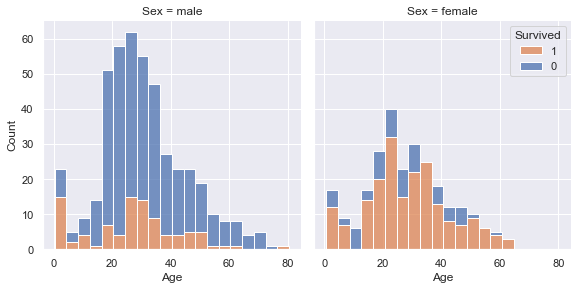

In [12]:
age_data = sns.FacetGrid(train, col = "Sex",height=4)
age_data.map_dataframe(sns.histplot, x="Age",hue='Survived',binwidth=4,multiple="stack")
age_data.set_axis_labels("Age", "Count")
plt.legend(['1','0'],title='Survived');

It can be seen from the left-hand side plot that men who are ~12 years old or younger had much higher chance of surviving than the rest of the men on board. Women of all ages had high survival rates.

In [13]:
# age statistics
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

The distribution of age seems to be skewed. Let's check the boxplot.

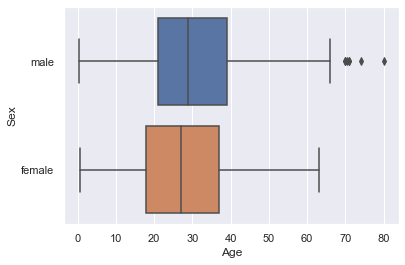

In [14]:
# Check outliers
#plt.figure(figsize=(2,5))
sns.boxplot(data=train, x='Age', y = 'Sex',orient='h');

Both Age distributions appear to be slightly skewed. Therefore, the median values will be used for imputation, as median is a better representation of the majority of the values in the dataset than the mean if the distribution is skewed.

### SibSP and Parch

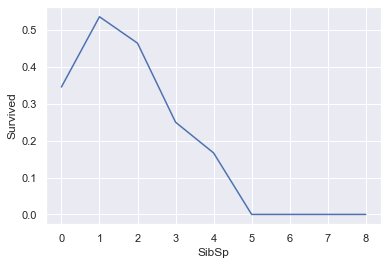

In [15]:
sibsp_surv = train.groupby('SibSp')['Survived'].mean()
sns.lineplot(data=sibsp_surv);

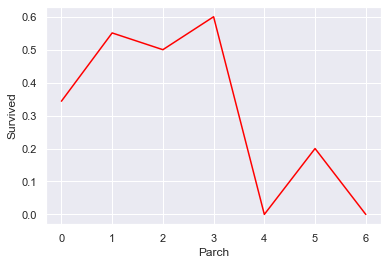

In [16]:
parch_surv = train.groupby('Parch')['Survived'].mean()
sns.lineplot(data=parch_surv,color='red');

It can be concluded from the above plots that smaller families had a higher chance of surviving.

### Fare

In [17]:
train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

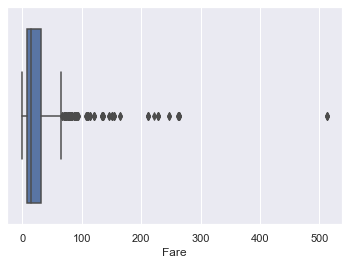

In [18]:
sns.boxplot(data=train, x='Fare', orient='h');

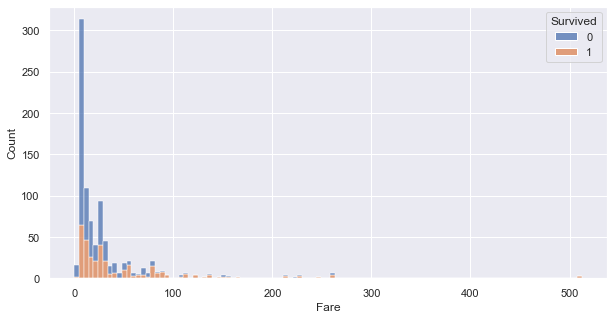

In [19]:
#stacked histogram
plt.figure(figsize=(10,5))
sns.histplot(data=train, hue='Survived', x="Fare",multiple="stack");

Two observations can be made about the Fare feature from the above plots: 

* First, it can be seen that the Fare data are highly skewed, so median imputation would have to be used for filling the missing values. However, there are no missing data in the training set.

* It appears that passengers who paid the lowest fares had a lower chance of surviving compared to those who paid more for the tickets.

### Cabin

In [20]:
cabin_missing = train['Cabin'].isnull().value_counts()

print('{} % of Cabin data are missing.'.format(round(cabin_missing[1]*100/cabin_missing.sum())))

77 % of Cabin data are missing.


Despite the large amount of missing data, an attempt will be made to extract some useful information from the Cabin data (see Feature engineering).

### Embarked

The port at which each passenger started the journey is likely to be not very important in predicting whether or not the passenger survived.

But let's check whether there is any correlation.

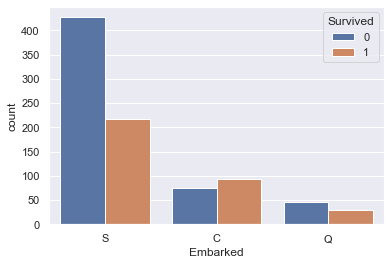

In [21]:
sns.countplot(x='Embarked', hue='Survived', data = train);

It the figure above it can be seen that passengers who embarked at Cherbourg had a higher chance of surviving.

### Correlations

From the above analysis, it can be concluded that relationships should exist between the features and the Survived label. To verify this, let's plot the correlations between all the features and the output variable (i.e., Survived).

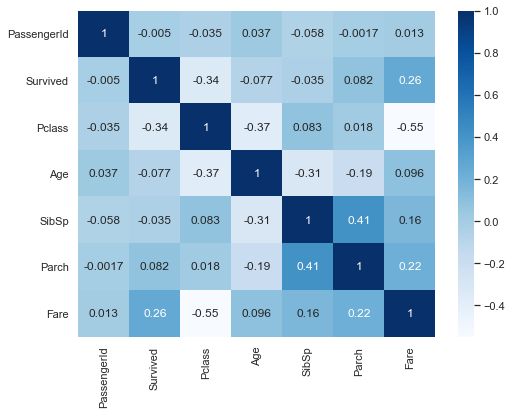

In [22]:
train_corr = train.corr(method='pearson')

# plot the above correlations using the Pearson correlation coefficient
plt.figure(figsize=(8,6))
sns.heatmap(train_corr,cmap='Blues',annot=True);

* From the above plot it can be seen that there is a weak positive correlation between the passengers who survived and the fare and a moderately-strong negative correlation between those who survived and the Pclass features - these observations are consistent with the above analysis. 

* There is a strong negative correlation between Fare and Pclass, and moderately strong correlations between Parch and SibSp, Pclass and Age, and Age and SibSp.

In [23]:
#tabulate the most important features
corr_highest = abs(train_corr["Survived"])
corr_highest = corr_highest[corr_highest> 0.2]
corr_highest

Survived    1.000000
Pclass      0.338481
Fare        0.257307
Name: Survived, dtype: float64

Of course, here we have only looked at the features containing numerical values. In the next section, categorical features such as 'Sex' will be converted to numbers, so that we can perform similar analysis to extract the most important features.

### Check the Test dataset for missing values

In [24]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [25]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

The Test dataset has 3 features with missing values - Age, Fare, and Cabin, which will need to be imputed.

<br>

## Feature engineering

In this step of the ML workflow, feature data will be converted to a format that can be used directly in an ML algorithm. 

This involves:

* converting categorical data into numerical values
* imputation of missing data 
* deriving new features
* feature selection

### Conversion of categorical data

Let's use label encoding and one-hot encoding (OHE) to convert categorical data to numbers. 

If we have nominal data (such as the 'Embarked' feature), then we first need to label-encode the data, and only then use one-hot encoding, because one-hot encoding only takes numerical categorical values. For ordinal data, we only need to use label encoding.

In [26]:
# import OHE
from sklearn.preprocessing import OneHotEncoder
# import label-encoder
from sklearn.preprocessing import LabelEncoder

In [27]:
# create label encoding object
l_enc = LabelEncoder()
# create one-hot encoding object
oh_enc = OneHotEncoder(handle_unknown="ignore")

<br>

**Convert 'Sex' data**

In [28]:
for data in [train, test]:
    data['Sex'] = l_enc.fit_transform(data['Sex']) # don't need to OHE, already binary

In [29]:
# let's check the dataframe
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


It can be seen that the 'Sex' feature has been converted to binary values - 1 refers to male passengers and 0 to female passengers. 

<br>

**Convert 'Embarked' data**

It was shown above that the 'Embarked' *training* data have missing values. Let's replace the missing entries with the most frequent value:

In [30]:
for data in [train]:
    data['Embarked'].fillna(data['Embarked'].value_counts().idxmax(), inplace=True)

In [31]:
# let's check for missing data
for data in [train, test]:
    print(data['Embarked'].isnull().values.any())

False
False


Now, apply label encoding and one-hot encoding on the 'Embarked' data.

In [32]:
for data in [train, test]:
    data['Embarked'] = l_enc.fit_transform(data['Embarked'])
    oh_enc_emb = pd.DataFrame(oh_enc.fit_transform(data[['Embarked']]).toarray())
    data[oh_enc.get_feature_names(['Embarked'])] = oh_enc_emb

In [33]:
# check data
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_0,Embarked_1,Embarked_2
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2,0.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,1.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2,0.0,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2,0.0,0.0,1.0


### Deriving new features

**Convert 'Name' data**

If we analyse the feature 'Name', it can be seen that we can extract the person's title from each name. Title can serve as an important feature for predicting survival, similar to the 'Sex' feature, which was already shown above to correlate with the passenger survival.

In the cells below, the title of each passenger will be first extracted. Then, the extracted title will be mapped to one of the titles from the dictionary 'title_library'.

In [34]:
title_library = {
    "Capt":       "Officer",
    "Col":        "Officer",
    "Major":      "Officer",
    "Dr":         "Officer",
    "Rev":        "Officer",
    "Jonkheer":   "Royalty",
    "Don":        "Royalty",
    "Sir" :       "Royalty",
    "the Countess":"Royalty",
    "Dona":       "Royalty",
    "Lady" :      "Royalty",
    "Mme":        "Mrs",
    "Mlle":       "Miss",
    "Ms":         "Mrs",
    "Mr" :        "Mr",
    "Mrs" :       "Mrs",
    "Miss" :      "Miss",
    "Master" :    "Master"
}

In [35]:
for data in [train, test]:
    # First, remove everything apart from the title
    data['Title'] = data['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
    data['Title'] = data['Title'].map(title_library)

    data['Title'] = l_enc.fit_transform(data['Title'])

    oh_enc_title = pd.DataFrame(oh_enc.fit_transform(data[['Title']]).toarray())
    data[oh_enc.get_feature_names(['Title'])] = oh_enc_title

In [36]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked_0,Embarked_1,Embarked_2,Title,Title_0,Title_1,Title_2,Title_3,Title_4,Title_5
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,...,0.0,0.0,1.0,2,0.0,0.0,1.0,0.0,0.0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,...,1.0,0.0,0.0,3,0.0,0.0,0.0,1.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,...,0.0,0.0,1.0,1,0.0,1.0,0.0,0.0,0.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,...,0.0,0.0,1.0,3,0.0,0.0,0.0,1.0,0.0,0.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,...,0.0,0.0,1.0,2,0.0,0.0,1.0,0.0,0.0,0.0


<br>

**New feature - FamSize (Family size)**

Let's create a new feature called 'FamSize' from SibSp and Parch as it could be an important feature.

Famsize = SibSp + Parch + 1 (alone).  

In [37]:
for data in [train, test]:    
    data['FamSize'] = data['SibSp'] + data['Parch'] + 1 

<br>

**New feature - 'alone'**

Let's generate a new feature called 'alone' to separated passengers who travelled alone or with other family members.

In [38]:
for data in [train, test]:
    data.loc[data['FamSize'] == 1, 'alone'] = 1
    data.loc[data['FamSize'] > 1, 'alone'] = 0

In [39]:
#check data
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked_2,Title,Title_0,Title_1,Title_2,Title_3,Title_4,Title_5,FamSize,alone
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,...,1.0,2,0.0,0.0,1.0,0.0,0.0,0.0,2,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,...,0.0,3,0.0,0.0,0.0,1.0,0.0,0.0,2,0.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,...,1.0,1,0.0,1.0,0.0,0.0,0.0,0.0,1,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,...,1.0,3,0.0,0.0,0.0,1.0,0.0,0.0,2,0.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,...,1.0,2,0.0,0.0,1.0,0.0,0.0,0.0,1,1.0


### Imputation of missing values

It was shown above that the Age, Fare, and Cabin data have some missing values, which we need to impute.

**Age**

In [40]:
# Check for missing data
print('Age training data missing values:', train['Age'].isnull().values.sum())
print('Age test data missing values:', test['Age'].isnull().values.sum())

Age training data missing values: 177
Age test data missing values: 86


A large proportion of the 'Age' data have missing values in both the train and test data. To get a more representative value for the missing values, the data will be imputed by the median value based on the 'Sex', 'Pclass', and 'Title' categories. 

In [41]:
for data in [train, test]:
    data['Age'] = data.groupby(['Sex', 'Pclass','Title'])['Age'].apply(lambda x: x.fillna(x.median()))

<br>

**new feature - 'young'**

In EDA, it was found that young people have higher chance of surviving, so let's create a new feature - young - to select people younger than 12 years of age. Master is also selected. 

In [42]:
for data in [train, test]:
    data.loc[data['Age'] < 12, 'young'] = 1
    data.loc[data['Age'] >= 12, 'young'] = 0
    data.loc[data['Title'] == 'Master', 'young'] = 1 # Master = young men

<br>

**Fare**

In [43]:
# Check for missing data
print('Fare training data missing values:', train['Fare'].isnull().values.sum())
print('Fare test data missing values:', test['Fare'].isnull().values.sum())

Fare training data missing values: 0
Fare test data missing values: 1


There is only one missing value in the 'Fare' test data. Let's impute that value with the median value of the data as the data are highly skewed.

In [44]:
# Use median imputation
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='median')

for data in [test]:
    data['Fare'] = imp.fit_transform(data[['Fare']])

<br>

**Cabin**

If we look up what the description of 'Cabin' means, we would find that the letter in front of the number (e.g., C85) refers to a specific deck on the Titanic. Let's extract these letters and see what we get.

In [45]:
decks = train['Cabin'].str.extract('([a-zA-Z]+)', expand=True).value_counts()

In [46]:
print(decks)

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
dtype: int64


We extracted letters A-G and T. 

It can also be found in various online sources that the bulk of 1st class passengers rooms were located on decks A-C, the 2nd class passenger rooms on decks D-E, and the 3rd class passengers rooms on decks F-G. 'T' deck was part of the boat deck for the 1st class passengers.

Knowing this information and the fact that there is a correlation between Pclass and Survived, it is worth deriving a new feature 'Deck'.

Let's check for missing values.

In [47]:
# Check for missing data
print('Cabin training data missing values:', train['Cabin'].isnull().values.sum(),'; total:',len(train))
print('Cabin test data missing values:', test['Cabin'].isnull().values.sum(),'; total:',len(test))

Cabin training data missing values: 687 ; total: 891
Cabin test data missing values: 327 ; total: 418


This shows the vast majority of the Cabin data are missing. We could replace the missing values by letter 'U' (i.e., unknown), and then group the remaining letters in groups A-C, D-E, and F-G. Let's also replace 'T' by 'A', as A and T decks were mainly occupied by the 1st class passengers. 

In [48]:
for data in [train, test]:    
    data['Deck'] = data['Cabin'].str.extract('([a-zA-Z]+)', expand=True).fillna(value='U')
    data['Deck'] = data['Deck'].replace('T','A')
    data['Deck'] = data['Deck'].replace(['A','B','C'],'ABC')
    data['Deck'] = data['Deck'].replace(['D','E'],'DE')
    data['Deck'] = data['Deck'].replace(['F','G'],'FG')

    oh_enc_deck = pd.DataFrame(oh_enc.fit_transform(data[['Deck']]).toarray())
    data[oh_enc.get_feature_names(['Deck'])] = oh_enc_deck

In [49]:
# check data
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Title_4,Title_5,FamSize,alone,young,Deck,Deck_ABC,Deck_DE,Deck_FG,Deck_U
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,...,0.0,0.0,2,0.0,0.0,U,0.0,0.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,...,0.0,0.0,2,0.0,0.0,ABC,1.0,0.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,...,0.0,0.0,1,1.0,0.0,U,0.0,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,...,0.0,0.0,2,0.0,0.0,ABC,1.0,0.0,0.0,0.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,...,0.0,0.0,1,1.0,0.0,U,0.0,0.0,0.0,1.0


<br>

### Feature selection

We have now cleaned the data and have created a few new features. The next step is to select the relevent, most important features for modeling. There are three main reasons why we need to do this:

* reduces the chance of overfitting - excluding the redundant features from the dataset reduces the probability that the model would fit to noise
* computations are less computationally expensive - fewer features means that the algorithm is simpler and can be trained faster
* improved accuracy - excluding the irrelvant features often gives better model accuracy

Before selecting the most important features, let's remove the featues that we do not need. For example, we can drop the 'Name' feature, as we have extracted the 'Title' features instead.

In [50]:
# check the column names
train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Embarked_0',
       'Embarked_1', 'Embarked_2', 'Title', 'Title_0', 'Title_1',
       'Title_2', 'Title_3', 'Title_4', 'Title_5', 'FamSize', 'alone',
       'young', 'Deck', 'Deck_ABC', 'Deck_DE', 'Deck_FG', 'Deck_U'],
      dtype=object)

In [51]:
# columns to drop
drop_col0 = ['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked','Title','Deck']

# create passengerId for submission
passengerid = test['PassengerId']

train = train.drop(columns=drop_col0)
test = test.drop(columns=drop_col0)

In [52]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked_0,Embarked_1,Embarked_2,Title_0,Title_1,...,Title_3,Title_4,Title_5,FamSize,alone,young,Deck_ABC,Deck_DE,Deck_FG,Deck_U
0,0,3,1,22.0,7.2500,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,2,0.0,0.0,0.0,0.0,0.0,1.0
1,1,1,0,38.0,71.2833,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,2,0.0,0.0,1.0,0.0,0.0,0.0
2,1,3,0,26.0,7.9250,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1,1.0,0.0,0.0,0.0,0.0,1.0
3,1,1,0,35.0,53.1000,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,2,0.0,0.0,1.0,0.0,0.0,0.0
4,0,3,1,35.0,8.0500,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1,1.0,0.0,0.0,0.0,0.0,1.0


We now have 21 features to select from. 

Two ways of how we could select the most important features are:

* statistical tests, for example, using the scikit-learn library SelectKBest (i.e., univariate feature selection)
* extracting feature importances from the data using tree-based classifiers 


<br>

**Statistical tests** 

Let's use SelectKBest with chi2 test. This enables us to select the features that have the strongest relationship with the output variable.

In [53]:
# prepare data
y_fs = train['Survived'].values
X_fs = train.drop(columns='Survived')

from sklearn.feature_selection import SelectKBest, chi2

best_features = SelectKBest(score_func=chi2,k='all').fit(X_fs, y_fs)

In [54]:
best_feature_names = X_fs.columns[best_features.get_support()]

best_features_df = pd.DataFrame(data=best_features.scores_,index=best_feature_names, columns=['chi2']).sort_values(by='chi2',ascending=False)
print(best_features_df)

                   chi2
Fare        4518.319091
Title_2      112.805785
Sex           92.702447
Title_3       90.900821
Title_1       78.302231
Deck_DE       37.626342
Deck_ABC      31.549842
Pclass        30.873699
Age           22.008194
Deck_U        20.488314
Embarked_0    20.464401
alone         14.640793
young         10.487543
Title_0        6.180425
Embarked_2     5.489205
Deck_FG        3.002994
Title_5        0.987834
Title_4        0.856126
FamSize        0.336787
Embarked_1     0.010847


Let's select all the features with chi2 values greater than 10, i.e., the 13 best features in terms of the chi2 score.

In [55]:
best_features_select = SelectKBest(score_func = chi2,k = 13).fit(X_fs, y_fs)
best_features_select_names = X_fs.columns[best_features_select.get_support()]
best_features_select_names

Index(['Pclass', 'Sex', 'Age', 'Fare', 'Embarked_0', 'Title_1', 'Title_2',
       'Title_3', 'alone', 'young', 'Deck_ABC', 'Deck_DE', 'Deck_U'],
      dtype='object')

<br>

**Feature importance based on tree-based approach**

Let's use the DecisionTreeClassifier to select the most important features.

In [56]:
from sklearn.tree import DecisionTreeClassifier
#from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier(random_state=42)

grid_values_dt = {'max_features' : ['auto', 'sqrt', 'log2'],
                  'max_depth': [i for i in range(5, 20)],
                  'min_samples_leaf': [i for i in range(1, 10)]
                 }

dt_model_feat_sel = GridSearchCV(estimator = dt, param_grid = grid_values_dt).fit(X_fs,y_fs)

In [57]:
# check the best parameters
print(dt_model_feat_sel.best_params_)

{'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 3}


In [58]:
dt_model_feat_sel = DecisionTreeClassifier(max_depth = 5, min_samples_leaf = 3, max_features = 'auto', random_state=42).fit(X_fs,y_fs)

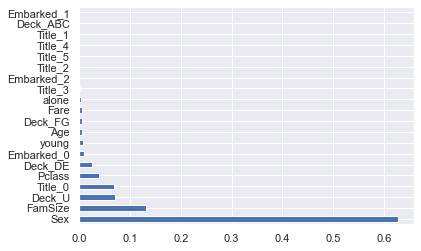

In [59]:
feat_imp = pd.Series(dt_model_feat_sel.feature_importances_, index=X_fs.columns)
feat_imp.sort_values(ascending=False).plot(kind='barh');

In [60]:
feat_imp.sort_values(ascending=False)

Sex           0.627875
FamSize       0.131183
Deck_U        0.071142
Title_0       0.068928
Pclass        0.037811
Deck_DE       0.025168
Embarked_0    0.010177
young         0.007907
Age           0.005741
Deck_FG       0.005531
Fare          0.005191
alone         0.002588
Title_3       0.000413
Embarked_2    0.000199
Title_2       0.000147
Title_5       0.000000
Title_4       0.000000
Title_1       0.000000
Deck_ABC      0.000000
Embarked_1    0.000000
dtype: float64

If we compare the best features from the two analyses, we can see that there is a reasonably good agreement between the two results, as features such as Sex, Pclass, Deck_DE, Age, young, alone, Fare, Embarked_0, and Title_ score reasonably high using both feature selection methods.

Let's try and see how ML algorithms perform when we use the features extracted from the 1st approach, namely the SelectKBest approach.

<br>

## Model selection and validation

Create training data for modeling - select features and separate features from the output labels.

In [61]:
# select the training data and the columns that you want to use in modeling

# labels
y_train = train['Survived'].values

# training set
X_train = train.loc[:,best_features_select_names]

# test set
X_test = test.loc[:,best_features_select_names]

In [62]:
# check train data
X_train.head()

,Pclass,Sex,Age,Fare,Embarked_0,Title_1,Title_2,Title_3,alone,young,Deck_ABC,Deck_DE,Deck_U
0,3,1,22.0,7.2500,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,0,38.0,71.2833,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,3,0,26.0,7.9250,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1,0,35.0,53.1000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,3,1,35.0,8.0500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [63]:
# check test data
X_test.head()

,Pclass,Sex,Age,Fare,Embarked_0,Title_1,Title_2,Title_3,alone,young,Deck_ABC,Deck_DE,Deck_U
0,3,1,34.5,7.8292,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,3,0,47.0,7.0000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,2,1,62.0,9.6875,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,3,1,27.0,8.6625,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,3,0,22.0,12.2875,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


*Note on normalisation/scaling: in some cases (e.g., when feature values have very different ranges), we need to scale or normalize the training and test sets before use with a classifier. The proper way to do cross-validation when you need to scale the data is not to scale the entire dataset with a single transform, since this will indirectly leak information into the training data about the whole dataset, including the test data. Instead, scaling must be performed for each cross-validation fold separately. The easiest way to achieve this in scikit-learn is to use **pipelines**.*

As this is a classification problem, we need to use classification algortihms. 

Let's screen several (optimised) classification algorithms and determine their accuracy. 

<br>

**K-nearest neighbor**

Use the K-nearest neighbor classifier as a basline model.

In [64]:
# import the necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# generate scaler object
scaler = StandardScaler()

# create knn classifier object 
knn = KNeighborsClassifier()

#use pipeline
pipeline_knn = Pipeline([('scaler', scaler), ('knn', knn)])

#define grid values
grid_values_knn = {'knn__n_neighbors': [i for i in range(1,10,1)]}
 
knn_grid = GridSearchCV(estimator=pipeline_knn, cv=5, param_grid = grid_values_knn, scoring = 'accuracy')

knn_model = knn_grid.fit(X_train,y_train)

In [65]:
print('Optimised parameter settings knn: {}'.format(knn_model.best_params_))
print('Best CV score knn: {}'.format(knn_model.best_score_))

Optimised parameter settings knn: {'knn__n_neighbors': 3}
Best CV score knn: 0.8114682066411399


<br>

**Support-Vector Machine (SVM)**

In [66]:
from sklearn.svm import SVC

# create svc classifier object
svc = SVC(kernel = 'rbf')

pipeline_svc = Pipeline([('scaler', scaler), ('svc', svc)])

# parameter optimisation
grid_values_svc = {'svc__C': np.linspace(1,100,5), 
                   'svc__gamma': np.linspace(0.01,0.5,5)}

svc_grid = GridSearchCV(estimator = pipeline_svc, cv=5, param_grid = grid_values_svc, scoring = 'accuracy')

svc_model = svc_grid.fit(X_train,y_train)

In [67]:
print('Optimised parameter settings SVM: {}'.format(svc_model.best_params_))
print('Best CV score SVM: {}'.format(svc_model.best_score_))

Optimised parameter settings SVM: {'svc__C': 100.0, 'svc__gamma': 0.01}
Best CV score SVM: 0.8238026489234824


<br>

**Logistic Regression**

In [68]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42)

pipeline_lr = Pipeline([('scaler', scaler), ('lr', lr)])

# parameter optimisation
grid_values_lr = {'lr__C': np.linspace(0.1,10,10)}

lr_grid = GridSearchCV(pipeline_lr, param_grid = grid_values_lr, scoring = 'accuracy')

lr_model = lr_grid.fit(X_train,y_train)

In [69]:
print('Optimised parameter settings logistic regression: {}'.format(lr_model.best_params_))
print('Best CV score logistic regression: {}'.format(lr_model.best_score_))

Optimised parameter settings logistic regression: {'lr__C': 2.3000000000000003}
Best CV score logistic regression: 0.8125666938673028


<br>

**Decision Trees**

In [70]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)

grid_values_dt = {'max_features' : ['auto', 'sqrt', 'log2'],
                  'max_depth': [i for i in range(5, 20)],
                  'min_samples_leaf': [i for i in range(1, 10)]
                 }

dt_grid = GridSearchCV(estimator = dt, param_grid = grid_values_dt, cv = 5)

dt_model = dt_grid.fit(X_train,y_train)

In [71]:
print('Optimised parameter settings Decision Trees: {}'.format(dt_model.best_params_))
print('Best CV score Decision Trees: {}'.format(dt_model.best_score_))

Optimised parameter settings Decision Trees: {'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 6}
Best CV score Decision Trees: 0.8260686711443099


<br>

**Random Forest**

In [72]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

grid_values_rf = {'n_estimators': [i for i in range(60, 80, 5)],
                  'max_depth': [i for i in range(10, 20, 2)],
                  'min_samples_split': [i for i in range(8, 12)],
                  'min_samples_leaf': [i for i in range(1, 5)]
                 }

rf_grid = GridSearchCV(estimator = rf, param_grid = grid_values_rf, cv = 5)

rf_model = rf_grid.fit(X_train,y_train)

In [73]:
print('Optimised parameter settings Random Forest: {}'.format(rf_model.best_params_))
print('Best CV score Random Forest: {}'.format(rf_model.best_score_))

Optimised parameter settings Random Forest: {'max_depth': 14, 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 60}
Best CV score Random Forest: 0.8372920720607621


<br>

**Check confusion matrix for the Random Forest classifier**

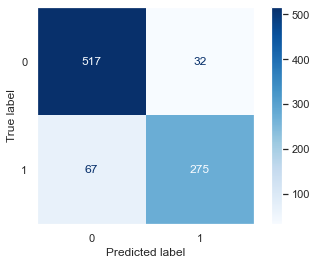

In [74]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(rf_model, X_train, y_train, cmap=plt.cm.Blues)  
plt.grid(False)

It can be seen from the confusion matrix that there are 32 *false positives* and 67 *false negatives*. In addition, the output label ('Survived') classes are not highly skewed so the use of the accuracy metric for evaluating the goodness of models is justified.

### Model comparison

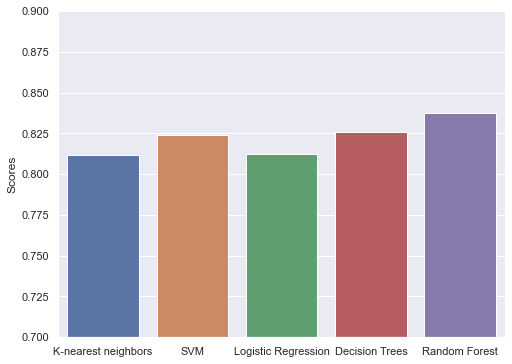

In [75]:
scores = np.array([knn_model.best_score_, svc_model.best_score_ , lr_model.best_score_, dt_model.best_score_, rf_model.best_score_])
algorithms = np.array(['K-nearest neighbors', 'SVM', 'Logistic Regression','Decision Trees','Random Forest'])

ML_scores = pd.DataFrame(scores, index=algorithms, columns=['Scores'])
#ML_scores

plt.figure(figsize=(8,6))
sns.barplot(x = ML_scores.index, y=ML_scores.Scores, data = ML_scores)
plt.ylim([0.7,0.9]);

It can be seen that all the models tested perform well and have accuracy above 80 %. 

The Random Forest classifier has the best performance with 84 % accuracy. Hence, it will be used to make predictions.

It is worth noting that the model performance can probably be further improved by 

* more careful feature selection
* testing other ML algorithms (e.g., neural networks)

## Making predictions

Let's make predictions using the trained Random Forest model.

In [76]:
y_pred = rf_model.predict(X_test)

ans = pd.DataFrame({'PassengerId': passengerid, 'Survived': y_pred})

ans.to_csv('Titanic_pred.csv', index = False)